In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import sys
import os
import torch

In [123]:
ENERGY_PATH = "data/energy/"
WEATHER_PATH = "data/weather/Weather_Data_Germany.csv"

weather_data = pd.read_csv(WEATHER_PATH, sep=",")

prices_data = pd.read_csv(ENERGY_PATH + "Prices_Europe.csv", sep=";")
installed_capacity = pd.read_csv(ENERGY_PATH + "Installed_Capacity_Germany.csv", sep=";")
weather_data.tail()

,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
2104315,14.8,51.2,2021-12-31 00:00:00,2021-12-31 23:00:00,2835274.0,2180.3394,101831.690,838.02860,1.000008,6.772395,-0.635157,283.54050,2171042.0,4075276.0,10313.742,0.001773,0.680833,11.236713,-1.493503
2104316,14.8,50.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3174462.0,1949.3633,102003.055,815.65460,0.981605,5.854994,0.206125,284.05286,3600288.0,5727868.0,25293.312,0.000539,0.622661,10.005124,-0.225957
2104317,14.8,49.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3614996.0,4384.6490,102251.730,741.03357,0.630130,5.271448,-1.014326,281.04538,3281948.0,5547652.0,25715.790,0.002406,0.851062,9.639029,-2.366759
2104318,14.8,48.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3894518.0,3073.1455,102469.890,420.26746,0.440941,4.102491,-0.592839,280.20236,4438841.0,6871398.0,27216.710,0.000576,0.897962,8.555898,-1.410386
2104319,14.8,47.2,2021-12-31 00:00:00,2021-12-31 23:00:00,4849962.0,9583.7320,102244.875,37.15387,0.035555,1.795015,-0.220017,273.95093,4189784.0,6439440.0,28799.164,0.000000,1.819780,4.665255,-2.722088


In [124]:

weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')
#weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'], format='%Y-%m-%d %H:%M:%S')
"""

march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
weather_data[weather_data['time'].dt.date.isin(march_2019.date)].head()
"""

"\n\nmarch_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')\noctober_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')\nweather_data[weather_data['time'].dt.date.isin(march_2019.date)].head()\n"

In [125]:
weather_data.tail()


,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
2104315,14.8,51.2,2021-12-31 00:00:00,2021-12-31 23:00:00,2835274.0,2180.3394,101831.690,838.02860,1.000008,6.772395,-0.635157,283.54050,2171042.0,4075276.0,10313.742,0.001773,0.680833,11.236713,-1.493503
2104316,14.8,50.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3174462.0,1949.3633,102003.055,815.65460,0.981605,5.854994,0.206125,284.05286,3600288.0,5727868.0,25293.312,0.000539,0.622661,10.005124,-0.225957
2104317,14.8,49.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3614996.0,4384.6490,102251.730,741.03357,0.630130,5.271448,-1.014326,281.04538,3281948.0,5547652.0,25715.790,0.002406,0.851062,9.639029,-2.366759
2104318,14.8,48.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3894518.0,3073.1455,102469.890,420.26746,0.440941,4.102491,-0.592839,280.20236,4438841.0,6871398.0,27216.710,0.000576,0.897962,8.555898,-1.410386
2104319,14.8,47.2,2021-12-31 00:00:00,2021-12-31 23:00:00,4849962.0,9583.7320,102244.875,37.15387,0.035555,1.795015,-0.220017,273.95093,4189784.0,6439440.0,28799.164,0.000000,1.819780,4.665255,-2.722088


In [126]:
#average the first 80 values of z
avg_z = np.mean(weather_data['z'][:80])
print(avg_z)

3360.2965609700004


In [127]:
# Converting 'forecast_origin' and 'time' to datetime
weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'])
weather_data['time'] = pd.to_datetime(weather_data['time'])

# Calculate the hourly averages while keeping 'time' and 'forecast_origin' columns
averages = weather_data.groupby('time').mean().reset_index()
averages['forecast_origin'] = weather_data['forecast_origin'].iloc[0]

# longitudes and latitudes no longer needed
averages.drop(['longitude', 'latitude'], axis=1, inplace=True)
averages.head()

,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin
0,2019-01-01 00:00:00,0.0,3360.296561,103009.967750,507.635043,0.966562,3.867164,1.065368,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01
1,2019-01-01 01:00:00,0.0,3360.296561,102964.489612,544.627164,0.959348,4.092345,1.116217,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01
2,2019-01-01 02:00:00,0.0,3360.296561,102908.208325,575.103757,0.966846,4.320050,1.223478,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01
3,2019-01-01 03:00:00,0.0,3360.296561,102827.034387,612.314609,0.979125,4.638074,1.222571,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01
4,2019-01-01 04:00:00,0.0,3360.296561,102725.913987,660.112603,0.981526,4.980449,1.055763,278.102989,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936,2019-01-01


In [128]:
# number of weather stations   
print("Number of unique longitude-latitude pairs: ", weather_data.groupby(["longitude", "latitude"]).ngroups)

Number of unique longitude-latitude pairs:  80


In [129]:
#column where t2m is converted to celsius from kelvin
averages['t2m_C'] = averages['t2m'] - 273.15

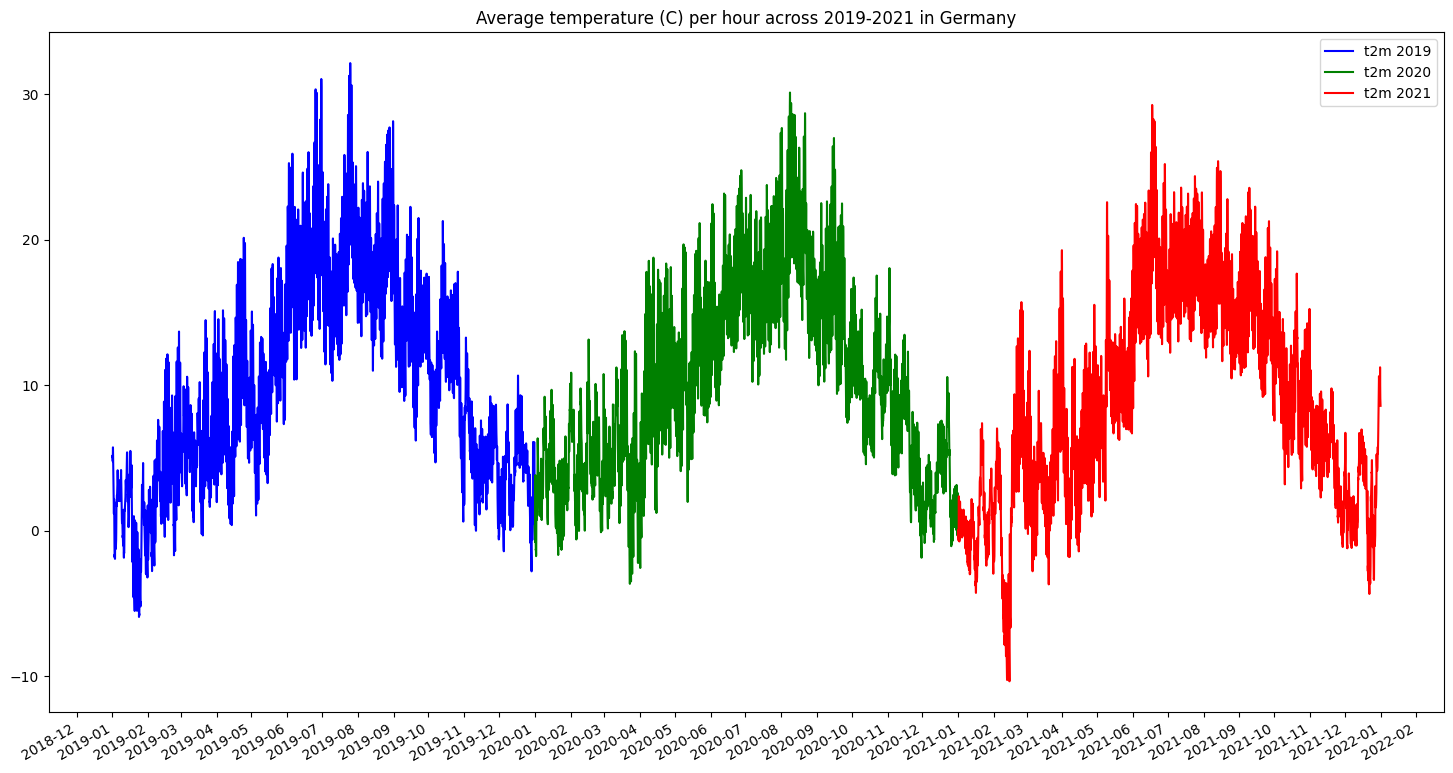

In [130]:
#plot ssr and t2m for each year separately
# add ticks on x axis for 
import matplotlib.dates as mdates

averages['time'] = pd.to_datetime(averages['time'])  # Make sure 'time' is in datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles if you want distinct appearances
colors = ['blue', 'green', 'red']
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = averages[averages['time'].dt.year == year]
    
    # Plot each year's data
    plt.plot(year_data['time'], year_data['t2m_C'], label=f't2m {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Average temperature (C) per hour across 2019-2021 in Germany")
plt.show()

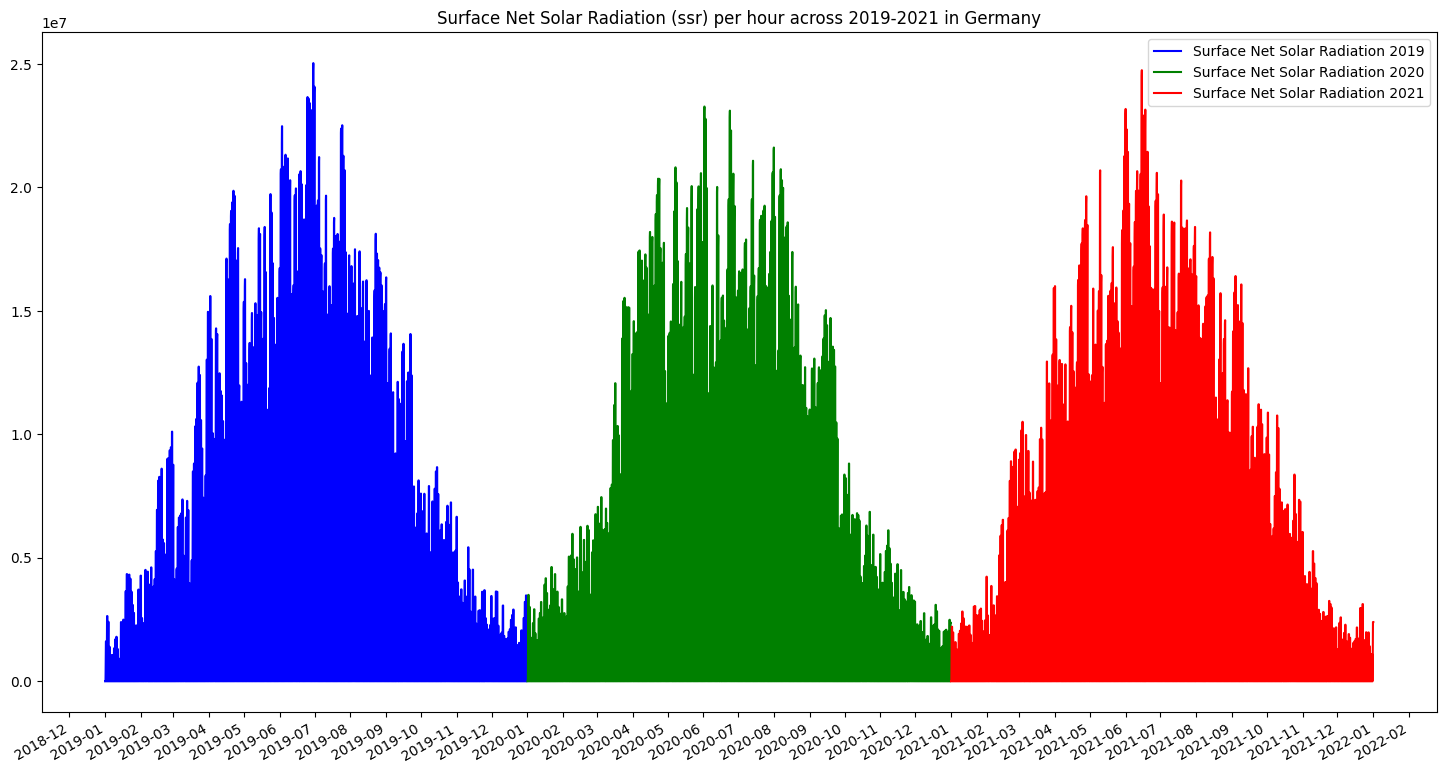

In [131]:
#same as above but for srr
averages['time'] = pd.to_datetime(averages['time'])  # Convert 'time' to datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles for visual distinction
colors = ['blue', 'green', 'red']  # Different colors for each year
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = averages[averages['time'].dt.year == year]
    
    # Plot 'srr' data for each year
    plt.plot(year_data['time'], year_data['ssr'], label=f'Surface Net Solar Radiation {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Surface Net Solar Radiation (ssr) per hour across 2019-2021 in Germany")
plt.show()

In [132]:
# find most significant variables in data for solar energy prediction / wind energy prediction
# normalize data + further pre processing
# build model
# train small train split for debugging
# train entire model
# finde tune hyperparameters with validation set    
# test model on test set

In [133]:
demand_data = pd.read_csv(ENERGY_PATH + "Reaslised_Demand_Germany.csv", sep=";")
demand_data.head()

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
0,01.01.19 00:00,01.01.19 00:15,"10.982,75","5.349,25","456,75"
1,01.01.19 00:15,01.01.19 00:30,"10.864,75","5.040,50","333,75"
2,01.01.19 00:30,01.01.19 00:45,"10.737,75","4.732,50",280
3,01.01.19 00:45,01.01.19 01:00,"10.680,25","4.617,50","304,5"
4,01.01.19 01:00,01.01.19 01:15,"10.599,00","4.485,00","249,75"


In [134]:
supply_data = pd.read_csv(ENERGY_PATH + "Realised_Supply_Germany.csv", sep=";")
supply_data.head()

,Date from,Date to,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW]
0,01.01.19 00:00,01.01.19 00:15,"1.199,00",401,"794,25","4.839,25",0,"31,5","2.250,50","1.733,00","836,25","850,5","87,5","431,75"
1,01.01.19 00:15,01.01.19 00:30,"1.203,00","394,75","793,5","5.030,75",0,"31,5","2.263,25","1.587,75","729,5","821,5","99,25","429,75"
2,01.01.19 00:30,01.01.19 00:45,"1.204,50","381,25","791,75","5.213,50",0,"31,5","2.246,00","1.555,25","648,5","804,75",44,"431,25"
3,01.01.19 00:45,01.01.19 01:00,"1.208,75",381,"754,5","5.308,25",0,"31,5","2.241,75","1.459,00","597,5","796,5",41,"431,5"
4,01.01.19 01:00,01.01.19 01:15,"1.204,50","388,25","715,5","5.398,50",0,"31,5","2.224,50","1.367,75","610,5","765,5",21,"429,25"


In [135]:
import pytz
# find time shift from winter to summer time in demand data "Date from" key

demand_data['Date from'] = pd.to_datetime(demand_data['Date from'],format='%d.%m.%y %H:%M')
demand_data['Date to'] = pd.to_datetime(demand_data['Date to'], format='%d.%m.%y %H:%M')
supply_data['Date from'] = pd.to_datetime(supply_data['Date from'], format='%d.%m.%y %H:%M')
supply_data['Date to'] = pd.to_datetime(supply_data['Date to'], format='%d.%m.%y %H:%M')
prices_data['Date from'] = pd.to_datetime(prices_data['Date from'],format='%d.%m.%y %H:%M')
prices_data['Date to'] = pd.to_datetime(prices_data['Date to'],format='%d.%m.%y %H:%M')
installed_capacity['Date from'] = pd.to_datetime(installed_capacity['Date from'])
installed_capacity['Date to'] = pd.to_datetime(installed_capacity['Date to'])



In [136]:
# get all days of march in 2019
march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
# show all instances in demanddata
demand_data[demand_data['Date from'].dt.date.isin(march_2019.date)].head(10)

#demand_data[demand_data['Date from'].dt.date.isin(october_2019.date)].head(50)

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
8544,2019-03-31 00:00:00,2019-03-31 00:15:00,"10.918,25","8.702,25","321,5"
8545,2019-03-31 00:15:00,2019-03-31 00:30:00,"10.817,00","8.551,25",339
8546,2019-03-31 00:30:00,2019-03-31 00:45:00,"10.624,50","8.285,00","444,5"
8547,2019-03-31 00:45:00,2019-03-31 01:00:00,"10.538,25","8.134,75","656,5"
8548,2019-03-31 01:00:00,2019-03-31 01:15:00,"10.436,00","8.041,50","425,25"
8549,2019-03-31 01:15:00,2019-03-31 01:30:00,"10.321,50","7.914,25",499
8550,2019-03-31 01:30:00,2019-03-31 01:45:00,"10.262,25","7.832,00","563,25"
8551,2019-03-31 01:45:00,2019-03-30 02:00:00,"7.354,50","4.910,75","672,25"
8552,2019-03-31 03:00:00,2019-03-31 03:15:00,"10.128,75","7.773,25","669,5"
8553,2019-03-31 03:15:00,2019-03-31 03:30:00,"10.123,25","7.659,00","712,5"


In [137]:
# convert to UTC
demand_data['Date from'] = demand_data['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
demand_data['Date to'] = demand_data['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')


supply_data['Date from'] = supply_data['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
supply_data['Date to'] = supply_data['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
prices_data['Date from'] = prices_data['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
prices_data['Date to'] = prices_data['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
installed_capacity['Date from'] = installed_capacity['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
installed_capacity['Date to'] = installed_capacity['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')



In [138]:
# get all days of march in 2019
march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
# show all instances in demanddata
demand_data[demand_data['Date from'].dt.date.isin(march_2019.date)].head(10)

#demand_data[demand_data['Date from'].dt.date.isin(october_2019.date)].head(50)

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
8548,2019-03-31 00:00:00+00:00,2019-03-31 00:15:00+00:00,"10.436,00","8.041,50","425,25"
8549,2019-03-31 00:15:00+00:00,2019-03-31 00:30:00+00:00,"10.321,50","7.914,25",499
8550,2019-03-31 00:30:00+00:00,2019-03-31 00:45:00+00:00,"10.262,25","7.832,00","563,25"
8551,2019-03-31 00:45:00+00:00,2019-03-30 01:00:00+00:00,"7.354,50","4.910,75","672,25"
8552,2019-03-31 01:00:00+00:00,2019-03-31 01:15:00+00:00,"10.128,75","7.773,25","669,5"
8553,2019-03-31 01:15:00+00:00,2019-03-31 01:30:00+00:00,"10.123,25","7.659,00","712,5"
8554,2019-03-31 01:30:00+00:00,2019-03-31 01:45:00+00:00,"10.111,50","7.640,25","740,25"
8555,2019-03-31 01:45:00+00:00,2019-03-31 02:00:00+00:00,"10.080,50","7.549,50","760,25"
8556,2019-03-31 02:00:00+00:00,2019-03-31 02:15:00+00:00,"10.018,25","7.443,25","928,25"
8557,2019-03-31 02:15:00+00:00,2019-03-31 02:30:00+00:00,"10.091,50","7.483,50","859,25"


In [139]:
#only use data until the end of 2021
demand_data_train = demand_data[demand_data['Date from'] < '2022-01-01']
supply_data_train = supply_data[supply_data['Date from'] < '2022-01-01']
demand_data_train.tail()



,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
105215,2021-12-31 22:45:00+00:00,2021-12-31 23:00:00+00:00,"11.205,00","3.226,25",756
105216,2021-12-31 23:00:00+00:00,2021-12-31 23:15:00+00:00,"11.161,50","3.194,75","599,75"
105217,2021-12-31 23:15:00+00:00,2021-12-31 23:30:00+00:00,"11.058,75","3.136,00",595
105218,2021-12-31 23:30:00+00:00,2021-12-31 23:45:00+00:00,"10.931,75","3.129,00","649,5"
105219,2021-12-31 23:45:00+00:00,2022-01-01 00:00:00+00:00,"10.763,50","2.992,50",695


In [140]:
def clean_convert_to_float(x):
    if not isinstance(x, str):
        return x
    x = x.replace('.', '').replace(',', '.')
    try:
        return float(x)
    except ValueError:
        return x
    

demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


C:\Users\belau\AppData\Local\Temp\ipykernel_23020\2441936016.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


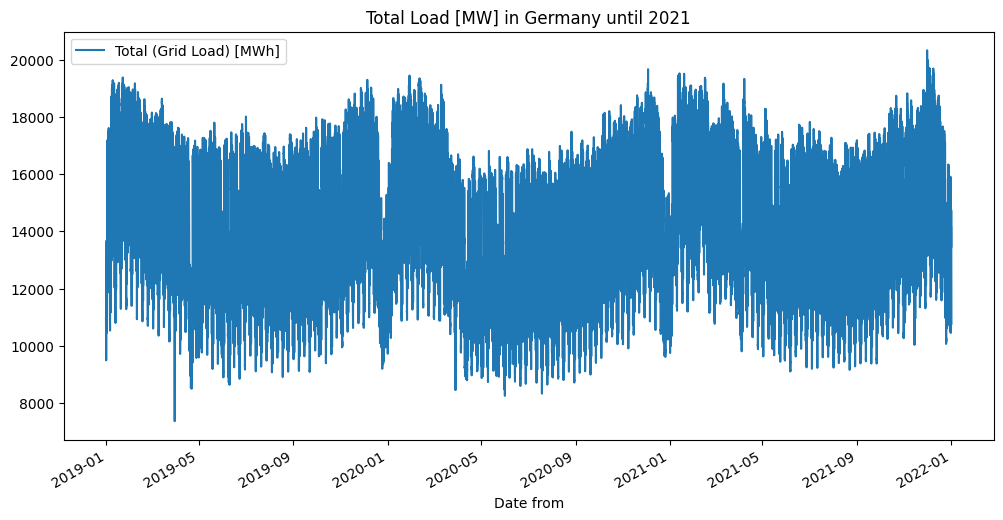

In [141]:


demand_data_train.plot(figsize=(12, 6), x='Date from', y='Total (Grid Load) [MWh]')
plt.title("Total Load [MW] in Germany until 2021")
plt.show()

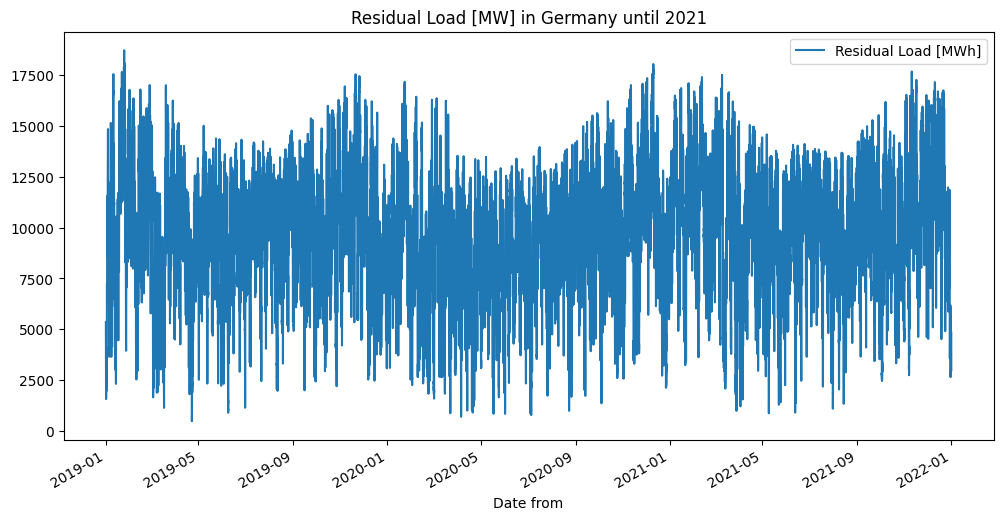

In [142]:
demand_data_train.plot(figsize=(12, 6), x='Date from', y='Residual Load [MWh]')
plt.title("Residual Load [MW] in Germany until 2021")
plt.show()

In [143]:

#fix typo in column name for wind offshore
supply_data_train.rename(columns={'Wind Offshore [MW] ': 'Wind Offshore [MW]'}, inplace=True)
supply_data_train.columns.values

C:\Users\belau\AppData\Local\Temp\ipykernel_23020\3759259857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train.rename(columns={'Wind Offshore [MW] ': 'Wind Offshore [MW]'}, inplace=True)


array(['Date from', 'Date to', 'Biomass [MW]', 'Hydro Power [MW]',
       'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaic [MW]',
       'Other Renewable [MW]', 'Nuclear Power [MW]', 'Lignite [MW]',
       'Coal [MW]', 'Natural Gas [MW]', 'Pumped Storage [MW]',
       'Other Conventional [MW]'], dtype=object)

In [144]:
supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)
# make sure it is float
supply_data_train["Wind total [MW]"].head()

C:\Users\belau\AppData\Local\Temp\ipykernel_23020\69185201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
C:\Users\belau\AppData\Local\Temp\ipykernel_23020\69185201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)


0    5633.50
1    5824.25
2    6005.25
3    6062.75
4    6114.00
Name: Wind total [MW], dtype: float64

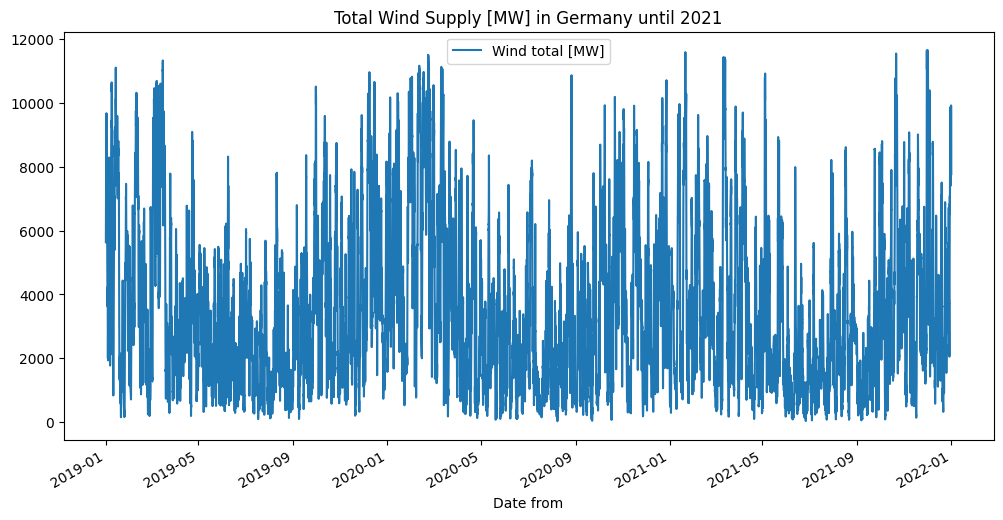

In [145]:
# plot total wind supply and photovoltaic supply
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Wind total [MW]')
plt.title("Total Wind Supply [MW] in Germany until 2021")
plt.show()


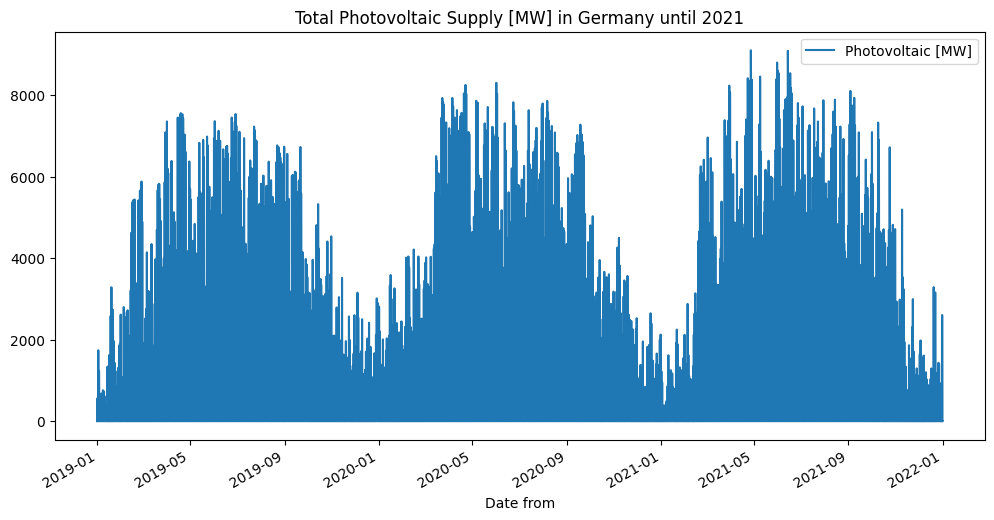

In [146]:
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Photovoltaic [MW]')
plt.title("Total Photovoltaic Supply [MW] in Germany until 2021")
plt.show()


In [151]:
installed_capacity_train = installed_capacity[installed_capacity['Date from'] < '2022-01-01']
installed_capacity_train.iloc[:, 2:] = installed_capacity_train.iloc[:, 2:].applymap(clean_convert_to_float)
prices_data_train = prices_data[prices_data['Date from'] < '2022-01-01']
prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)

C:\Users\belau\AppData\Local\Temp\ipykernel_23020\460908553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


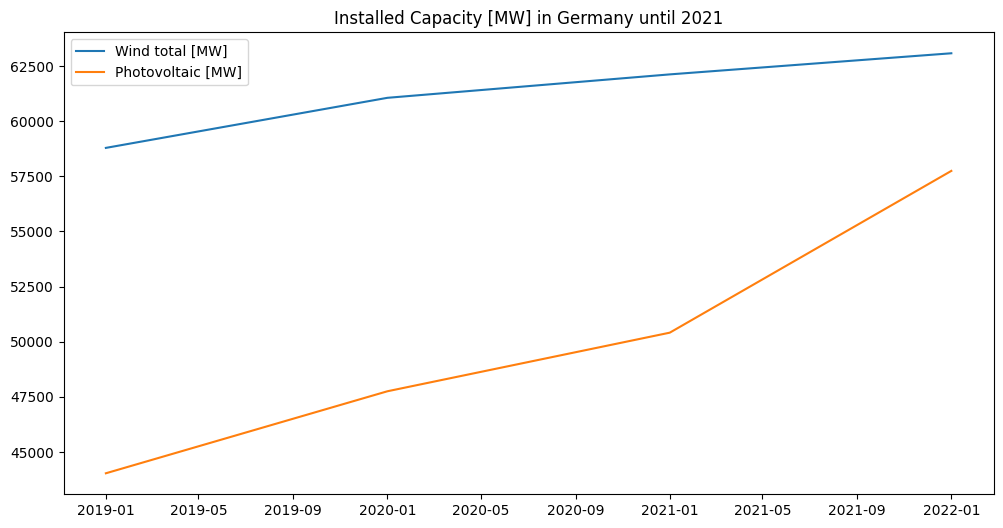

In [159]:
# combine wind offshore and onshore install capacity
installed_capacity_train["Wind total [MW]"] = installed_capacity_train[["Wind Offshore [MW] ", "Wind Onshore [MW]"]].sum(axis=1)
# plot wind total and photovoltaic installed capacity
plt.figure(figsize=(12, 6))
plt.plot(installed_capacity_train['Date from'], installed_capacity_train['Wind total [MW]'], label='Wind total [MW]')
plt.plot(installed_capacity_train['Date from'], installed_capacity_train['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.title("Installed Capacity [MW] in Germany until 2021")
plt.legend()
plt.show()

C:\Users\belau\AppData\Local\Temp\ipykernel_23020\751921817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
C:\Users\belau\AppData\Local\Temp\ipykernel_23020\751921817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train.replace('-', np.nan, inplace=True)


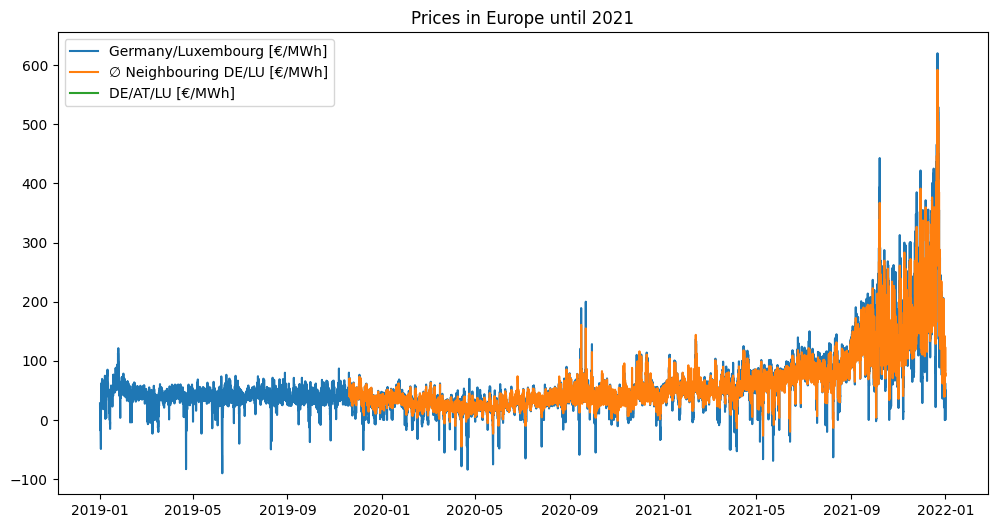

In [170]:
prices_data_train = prices_data[prices_data['Date from'] < '2022-01-01']
prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
# change - to None
prices_data_train.replace('-', np.nan, inplace=True)
# plot all prices in one big plot
plt.figure(figsize=(12, 6))
for column in ['Germany/Luxembourg [€/MWh]', '∅ Neighbouring DE/LU [€/MWh]', 'DE/AT/LU [€/MWh]']:
    plt.plot(prices_data_train['Date from'], prices_data_train[column], label=column)
plt.title("Prices in Europe until 2021")
plt.legend()
plt.show()


Prices for DE/AT/LU are missing completely and avg Neighbouring DE/LU is incomplete so I will not consider them for further training

In [174]:
print(10982.75	+ 10864.75	+ 10737.75	+ 10680.25	)

43265.5


In [182]:
# combine 15 minute intervals to hourly intervals in demand data
demand_data_train_hourly = demand_data_train.resample('H', on='Date from').sum()
demand_data_train_hourly.head()

assert len(demand_data_train_hourly.index) == len(demand_data_train.index) // 4

In [183]:
supply_data_train_hourly = supply_data_train.resample('H', on='Date from').sum()
assert len(supply_data_train_hourly.index) == len(supply_data_train.index) // 4

In [185]:
print(len(averages.index))
print(len(demand_data_train_hourly.index))
print(len(supply_data_train_hourly.index))

26304
26305
26305


In [165]:
#find columns with missing values
missing_demand = demand_data_train.isnull().sum()
missing_supply = supply_data_train.isnull().sum()
missing_weather = weather_data.isnull().sum()
missing_prices = prices_data_train.isnull().sum()
missing_capacity = installed_capacity_train.isnull().sum()
print("Missing values in demand data: \n", missing_demand[missing_demand > 0])
print("Missing values in supply data: \n", missing_supply[missing_supply > 0])
print("Missing values in weather data: \n", missing_weather[missing_weather > 0])
print("Missing values in prices data: \n", missing_prices[missing_prices > 0])
print("Missing values in capacity data: \n", missing_capacity[missing_capacity > 0])




Missing values in demand data: 
 Series([], dtype: int64)
Missing values in supply data: 
 Series([], dtype: int64)
Missing values in weather data: 
 Series([], dtype: int64)
Missing values in prices data: 
 ∅ Neighbouring DE/LU [€/MWh]     7776
Poland [€/MWh]                   7776
DE/AT/LU [€/MWh]                26305
Hungary [€/MWh]                    24
dtype: int64
Missing values in capacity data: 
 Series([], dtype: int64)


In [148]:
# find most significant variables in data for solar energy prediction / wind energy prediction

# normalize data
# check for seasonality
# build data and split in train and validation set



In [149]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    return adfuller(timeseries, autolag='AIC')
# check all variables in demand data
for col in demand_data_train.columns[2:]:
    result = test_stationarity(demand_data_train[col])
    print(f"Variable: {col}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("\n")
    

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#TODO normalize data with z-score

In [ ]:
# check all variables in supply data
for col in supply_data_train.columns[2:]:
    result = test_stationarity(supply_data_train[col])
    print(f"Variable: {col}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("\n")

Variable: Biomass [MW]
ADF Statistic: -7.302211
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Hydro Power [MW]
ADF Statistic: -5.772093
p-value: 0.000001
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Wind Offshore [MW]
ADF Statistic: -18.508978
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Wind Onshore [MW]
ADF Statistic: -15.233676
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Photovoltaic [MW]
ADF Statistic: -11.535736
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Other Renewable [MW]
ADF Statistic: -6.197198
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Nuclear Power [MW]
ADF Statistic: -6.320892
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Variable: Lignite [MW]
ADF Statistic: -10.790327
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	

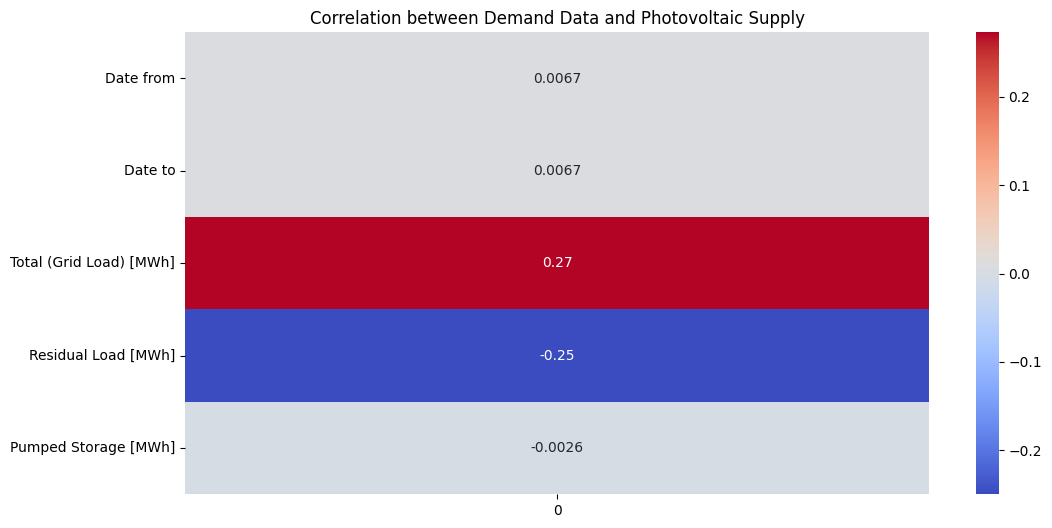

In [ ]:
#TODO plot pearson correlation between demand data and photo voltaic supply and weather and photo voltaic supply 
plt.figure(figsize=(12, 6))
sns.heatmap(demand_data_train.corrwith(supply_data_train['Photovoltaic [MW]']).to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation between Demand Data and Photovoltaic Supply")
plt.show()




In [ ]:
#TODO normalize data and